<a href="https://colab.research.google.com/github/behnaznikkhah/Project/blob/master/ImpactofCovidonStockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

(150, 1, 90) (150,) (31, 1, 90) (31,)
Epoch 1/200
1/1 - 0s - loss: 0.5722 - val_loss: 0.6195
Epoch 2/200
1/1 - 0s - loss: 0.4984 - val_loss: 0.4616
Epoch 3/200
1/1 - 0s - loss: 0.4273 - val_loss: 0.3049
Epoch 4/200
1/1 - 0s - loss: 0.3578 - val_loss: 0.1492
Epoch 5/200
1/1 - 0s - loss: 0.2890 - val_loss: 0.0389
Epoch 6/200
1/1 - 0s - loss: 0.2213 - val_loss: 0.1606
Epoch 7/200
1/1 - 0s - loss: 0.1653 - val_loss: 0.3094
Epoch 8/200
1/1 - 0s - loss: 0.1360 - val_loss: 0.4385
Epoch 9/200
1/1 - 0s - loss: 0.1472 - val_loss: 0.5252
Epoch 10/200
1/1 - 0s - loss: 0.1652 - val_loss: 0.5777
Epoch 11/200
1/1 - 0s - loss: 0.1789 - val_loss: 0.5999
Epoch 12/200
1/1 - 0s - loss: 0.1894 - val_loss: 0.5960
Epoch 13/200
1/1 - 0s - loss: 0.1928 - val_loss: 0.5718
Epoch 14/200
1/1 - 0s - loss: 0.1894 - val_loss: 0.5319
Epoch 15/200
1/1 - 0s - loss: 0.1802 - val_loss: 0.4800
Epoch 16/200
1/1 - 0s - loss: 0.1666 - val_loss: 0.4194
Epoch 17/200
1/1 - 0s - loss: 0.1509 - val_loss: 0.3530
Epoch 18/200
1/1 - 

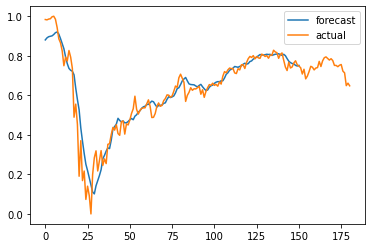

"\n\n# make a prediction\nyhat = model.predict(test_X)\ntest_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))\n# invert scaling for forecast\ninv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)\ninv_yhat = scaler.inverse_transform(inv_yhat)\ninv_yhat = inv_yhat[:,0]\n\n\n# invert scaling for actual\ntest_y = test_y.reshape((len(test_y), 1))\ninv_y = concatenate((test_y, test_X[:, 1:]), axis=1)\ninv_y = scaler.inverse_transform(inv_y)\ninv_y = inv_y[:,0]\n\n# calculate RMSE\nrmse = sqrt(mean_squared_error(inv_y, inv_yhat))\nprint('Test RMSE: %.3f' % rmse)"

In [7]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from math import sqrt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np

file_path_pandemics = os.path.abspath("")
file_path_index = os.path.abspath("")

data_pandemic = pd.read_csv(os.path.join(file_path_pandemics, 'PandemicData.csv'))#, parse_dates=['Date'], index_col='Date')

data_index = pd.read_csv(os.path.join(file_path_index, 'Data.csv'))#, parse_dates=['Date'], index_col='Date')
pandemicd = data_pandemic

pandemicd=pandemicd.groupby(['Date','Pandemic'],as_index=False).sum()
pandemicd=pandemicd[pandemicd.Pandemic.eq("Covid")]
#pandemicd['Change']=pandemicd['Deaths'].pct_change()
pandemicd = pandemicd.drop(['Pandemic'],1)
#pandemicd=pandemicd.dropna()
#df.fillna(0)
marketd = data_index
marketd=marketd[marketd.Country.eq("Canada")]
marketd = marketd.drop(['Volume','Low','Open','Change','High','Country','Vol.'], 1)
#marketd=marketd.set_index('Date')
#pandemicd=pandemicd.set_index('Date')
#join two time series
result = pd.merge(pandemicd, marketd, how='inner', on=['Date'])
result=result[['Date','Price','ActiveCases','Deaths']]
#print(result.head)

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = result
dataset=dataset.set_index('Date')
#dataset.index = pd.to_datetime(dataset['Date'])
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1,30)
#print(len(reframed.columns))
#print(reframed.head)


# drop columns we don't want to predict
reframed.drop(reframed.columns[[91,92]], axis=1, inplace=True)
#print(len(reframed.columns))
#print(reframed.head)


# split into train and test sets
values = reframed.values
#print((values))


n_train = 150
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
model.fit(train_X, train_y, epochs=200,batch_size=256, validation_data=(test_X, test_y), verbose=2, shuffle=True)
# plot history

"""
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
"""
forecast = []
for time in range(len(values)-30):
	X=values[time:time+30][:,:-1]
	X = X.reshape((30, 1, 90))
	yhat = model.predict(X)
	forecast.append(yhat)
#print(forecast) 
#forecast = forecast[120:]
results = np.array(forecast)[:, 0, 0]
#print(X)
#print(results)

plt.plot(results,label='forecast')
plt.plot(values[:,:][:,-1],label='actual')
plt.legend()
plt.show()

"""

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)"""

In [82]:
from numpy import array
x_input = array([[80, 85], [90, 95], [100, 105]])
print(x_input[0:2][:,:-1])
x_input = x_input.reshape((1, 3, 2))
print(x_input)

[[80]
 [90]]
[[[ 80  85]
  [ 90  95]
  [100 105]]]
